# Introduction Example for Image Processing
### Rices segmentation

name: Jorge Garcia

Se importa las librerías necesarias para el proyecto

In [1]:
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt

Se carga la imagen de 3 granos de arroz

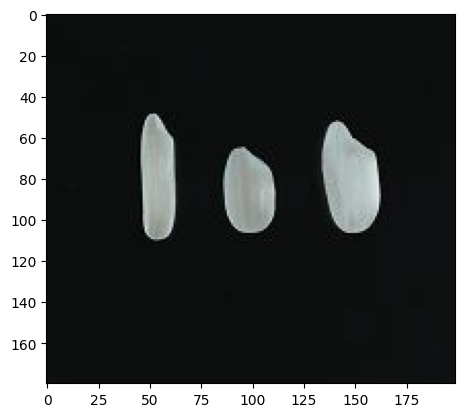

In [2]:
img = imread('3Arroz.jpg')
plt.imshow(img)
plt.show()

Se crea la función howis para obtener las características de la imagen (tamaño, máximo, mínimo).

In [3]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

howis(img)

size =  (180, 199, 3)
max  =  241
min  =  0


Se escoge uno de los canales RGB (para estos casos el Rojo)

size =  (180, 199)
max  =  231
min  =  0


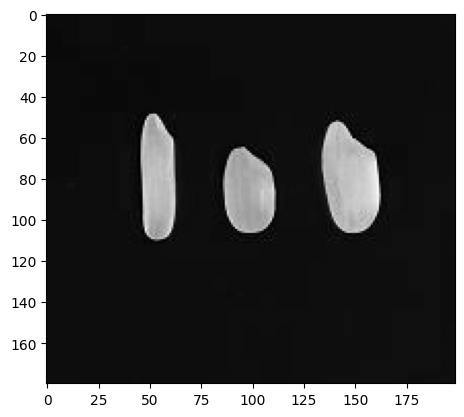

In [6]:
X_red = img[:,:,0]
howis(X_red) #Muestra las dimensiones
plt.imshow(X_red,cmap='gray') #Lo muestra en gris
plt.show()

Esta funcion fue creada para segmentar una imagen binarizando los píxeles con valores mayores que el umbral.

In [7]:
def segmenta(X,t):
  (N,M) = X.shape #Obtengo las dimensiones de la imagen 
  Y = np.zeros((N,M))
  area = 0
  for i in range(N):
    for j in range(M):
      if X[i,j] > t:
        Y[i,j] = 255
        area = area + 1
  print('area = ',area)
  return Y

Mostramos la imagen segmentada

area =  2855
size =  (180, 199)
max  =  255.0
min  =  0.0


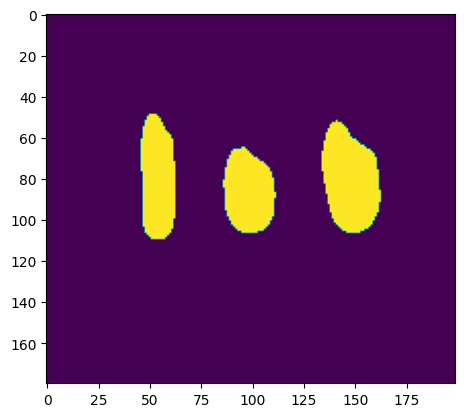

In [17]:
Y = segmenta(X_red,100) # segmentamos la imagen donde threshold is 100
howis(Y) #Muestra las dimensiones
plt.imshow(Y)
plt.show()

### Escogemos otra imagen con varios granos de arroz. 

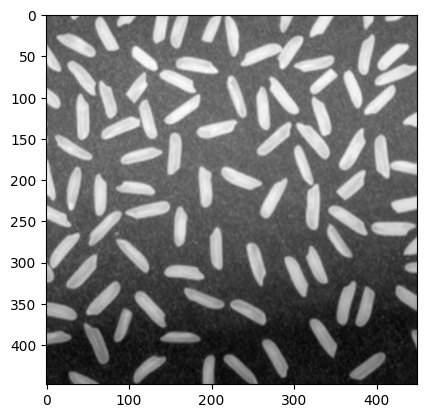

In [37]:
img2 = imread('rices.jpg')
plt.imshow(img2)
plt.show()

size =  (448, 450)
max  =  255
min  =  1


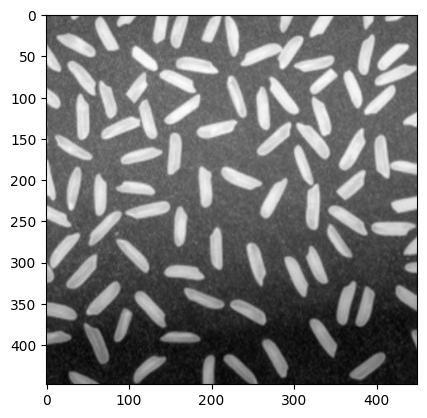

In [38]:
X_red2 = img2[:,:,0]
howis(X_red2) #Muestra las dimensiones
plt.imshow(X_red2,cmap='gray')
plt.show()

area =  101444
size =  (448, 450)
max  =  255.0
min  =  0.0


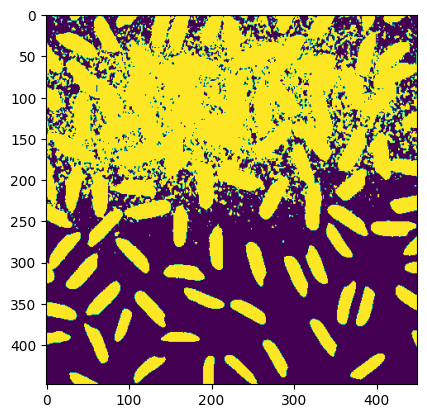

In [39]:
Y2 = segmenta(X_red2,100) # segmentamos la imagen donde threshold is 100
howis(Y2) #Muestra las dimensiones
plt.imshow(Y2)
plt.show()

Se puede observar que en la imagen anterior no se obtiene correctamente los resultados, por lo cual, se necesita que el background sea homogeneo.

Este código está llevando a cabo un proceso de normalización para centrar los valores de la matriz X_red2 con respecto a los valores mínimos de cada fila.

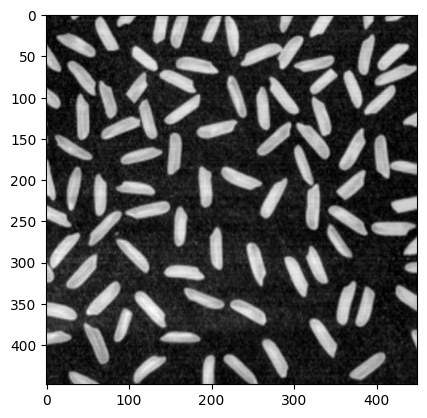

In [73]:
(N,M) = X_red2.shape
Xm    = np.zeros((N,M),np.uint8)
for i in range(N):
  xmin = np.min(X_red2[i,:])
  Xm[i,:] = X_red2[i,:] - xmin
plt.imshow(Xm,cmap='gray')
plt.show()

area =  48988
size =  (448, 450)
max  =  255.0
min  =  0.0


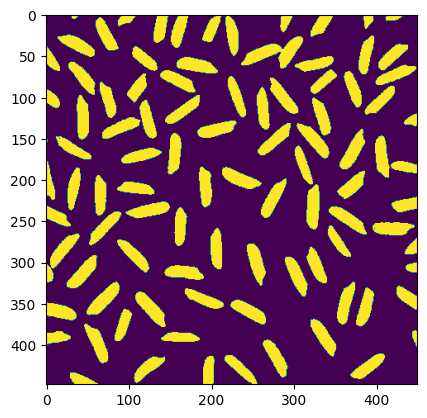

In [78]:
Y2 = segmenta(Xm,100) # segmentamos la imagen donde threshold is 122
howis(Y2) #Muestra las dimensiones
plt.imshow(Y2)
plt.show()

### Imagen con 2 granos de arroz, con luminación

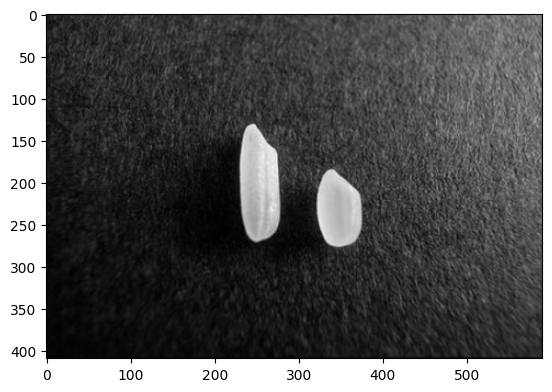

In [79]:
img3 = imread('2Arroz_gris.jpg')
plt.imshow(img3)
plt.show()

 se van a realizar los mismo procedimientos anteriores.

size =  (409, 590)
max  =  249
min  =  0


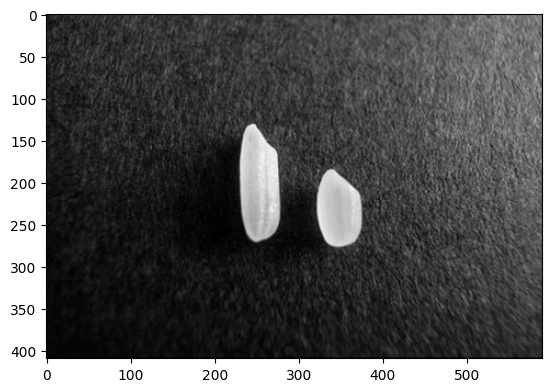

In [171]:
x_red3 = img3[:,:,0]
howis(x_red3) #Muestra las dimensiones
plt.imshow(x_red3,cmap='gray')
plt.show()

area =  48753
size =  (409, 590)
max  =  255.0
min  =  0.0


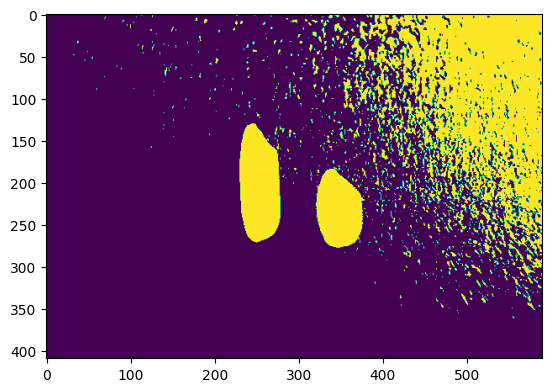

In [174]:
Y2 = segmenta(x_red3,80) # segmentamos la imagen donde threshold is 100
howis(Y2) #Muestra las dimensiones
plt.imshow(Y2)
plt.show()

Como podemos observar, para este caso no podemos realizar una segmentación limpia, por lo cual debemos considerar otro caso de normalización

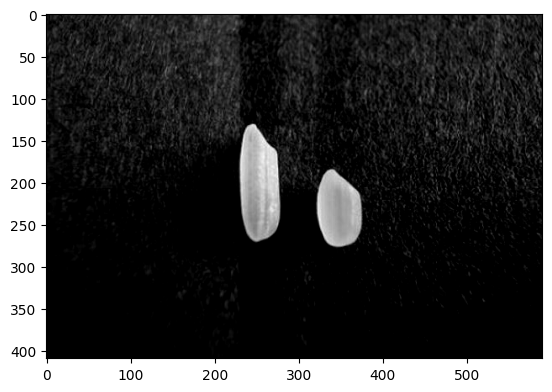

In [159]:

x_red3 =img3[:,:,0]
(N,M) = x_red3.shape
Xm    = np.zeros((N,M),np.uint8)

 #Se verifica de manera vertical y se restringe la resta para asegurar que el valor no sea negativo.
for i in range(M):
  xmin = np.median(x_red3[:,i]) #Se escoge la media
  Xm[:,i] = np.maximum(0, x_red3[:,i] - xmin)

plt.imshow(Xm,cmap='gray')
plt.show()

area =  9031
size =  (409, 590)
max  =  255.0
min  =  0.0


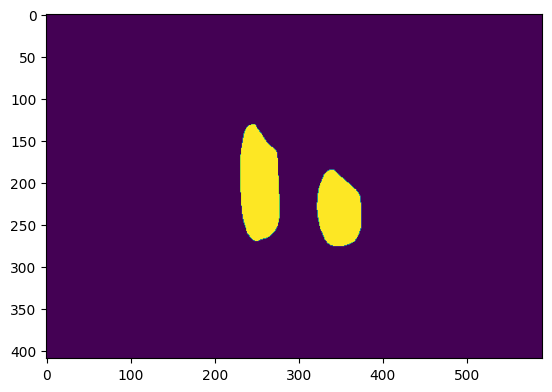

In [169]:
Y2 = segmenta(Xm,93) # segmentamos la imagen donde threshold is 93
howis(Y2) #Muestra las dimensiones
plt.imshow(Y2)
plt.show()

Con esto conseguimos una buena segmentación. 